<a href="https://colab.research.google.com/github/hajbidouae123-maker/DATA-SCIENCE-/blob/main/HAJBI_DOUAE_TP_inynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ucimlrepo


In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [12]:
from sklearn.neighbors import KNeighborsClassifier
# to get the online help, type:
?KNeighborsClassifier

This code will:
1. Import the `pandas` and `numpy` libraries.
2. Define the `link` to the white wine quality dataset.
3. Load the CSV file from the link into a pandas DataFrame `df`, specifying that the header should be inferred and the delimiter is a semicolon.
4. Print a summary of the dataset using `df.info()`.
5. Print the first 5 rows of the DataFrame using `df.head()`.

In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
sc = StandardScaler(with_mean=True, with_std=True)

# Fit the scaler ONLY on the training data
sc.fit(X_train)

# Transform both training and validation data using the fitted scaler
X_train_scaled = sc.transform(X_train)
X_val_scaled = sc.transform(X_val)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_val_scaled shape:", X_val_scaled.shape)

X_train_scaled shape: (2165, 11)
X_val_scaled shape: (2166, 11)


In [26]:
# get the min error and related k-value
import numpy as np # Ensure numpy is imported
err_min, ind_opt = error_val.min(), error_val.argmin()
k_star = k_vector[ind_opt]

print(f"Minimum Validation Error: {err_min:.4f}")
print(f"Optimal k-value (k*): {k_star}")

Minimum Validation Error: 0.5212
Optimal k-value (k*): 1


In [25]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_vector = np.arange(1, 37, 2) #define a vector of k=1, 3, 5, ...
error_train = np.empty(k_vector.shape)
error_val = np.empty(k_vector.shape)

for ind, k in enumerate(k_vector):
    #fit with k
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)

    # predict and evaluate on training and validation sets
    Ypred_train = clf.predict(X_train)
    error_train[ind] = 1 - accuracy_score(y_train, Ypred_train)

    Ypred_val = clf.predict(X_val)
    error_val[ind] = 1 - accuracy_score(y_val, Ypred_val)

print("Training Errors:", error_train)
print("Validation Errors:", error_val)

Training Errors: [0.         0.30161663 0.37413395 0.4073903  0.42401848 0.43879908
 0.45681293 0.4665127  0.47713626 0.47297921 0.4812933  0.49330254
 0.50161663 0.49792148 0.51177829 0.50669746 0.50808314 0.5113164 ]
Validation Errors: [0.5212373  0.57063712 0.55309326 0.54801477 0.53601108 0.54247461
 0.54155125 0.55124654 0.56186519 0.55124654 0.5544783  0.56140351
 0.55817175 0.5544783  0.56325023 0.56186519 0.55817175 0.55955679]


In [24]:
# Predict the labels of samples in X_val
Ypred_v = clf.predict(X_val)

# evaluate classification error rate
from sklearn.metrics import accuracy_score
accuracy_val = accuracy_score(y_val, Ypred_v)
error_val = 1 - accuracy_val

print(f"Validation Accuracy: {accuracy_val:.4f}")
print(f"Validation Error Rate: {error_val:.4f}")

Validation Accuracy: 0.4294
Validation Error Rate: 0.5706


In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Fit the model on the training data (X_train, y_train)
k = 3
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
from sklearn.model_selection import train_test_split

# First split: Separate 1/3 of the data for the final test set
# Xa, Ya will contain the remaining 2/3 for training and validation
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=1/3, stratify=Y)

# Second split: Divide the Xa, Ya portion into training and validation sets
# This results in Xa, Ya becoming the training set (1/3 of original data)
# and Xv, Yv becoming the validation set (1/3 of original data)
X_train, X_val, y_train, y_val = train_test_split(Xa, Ya, shuffle=True, test_size=0.5, stratify=Ya)

# Renaming for clarity as per the original request's intent
# So the final variables are X_train, y_train (1/3), X_val, y_val (1/3), Xt, Yt (1/3)

print(f"Original dataset size: {len(X)} samples")
print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(X):.2%})")
print(f"Validation set size: {len(X_val)} samples ({len(X_val)/len(X):.2%})")
print(f"Test set size: {len(Xt)} samples ({len(Xt)/len(X):.2%})")

Original dataset size: 6497 samples
Training set size: 2165 samples (33.32%)
Validation set size: 2166 samples (33.34%)
Test set size: 2166 samples (33.34%)


In [15]:
import pandas as pd
import numpy as np
link = "https://archive.ics.uci.edu/static/public/186/data.csv"
df = pd.read_csv(link, header="infer", delimiter=",")
print("\n========= Dataset summary ========= \n")
df.info()
print("\n========= A few first samples ========= \n")
print(df.head())


========= Dataset summary ========= 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB

========= A few first s

In [18]:
# Applying the binary classification to the original 'quality' column from df
# bad wine (y=0) : quality <= 5 and good quality (y= 1) otherwise
Y_binary_from_original = [0 if val <=5 else 1 for val in df['quality']]

# Display the new value counts to confirm the transformation
import pandas as pd
print("\n========= Binary Wine Qualities (using list comprehension on original data) ========= \n")
print(pd.Series(Y_binary_from_original).value_counts())


========= Binary Wine Qualities (using list comprehension on original data) ========= 

1    4113
0    2384
Name: count, dtype: int64


/tmp/ipython-input-3216072364.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90) # Rotate labels for readability


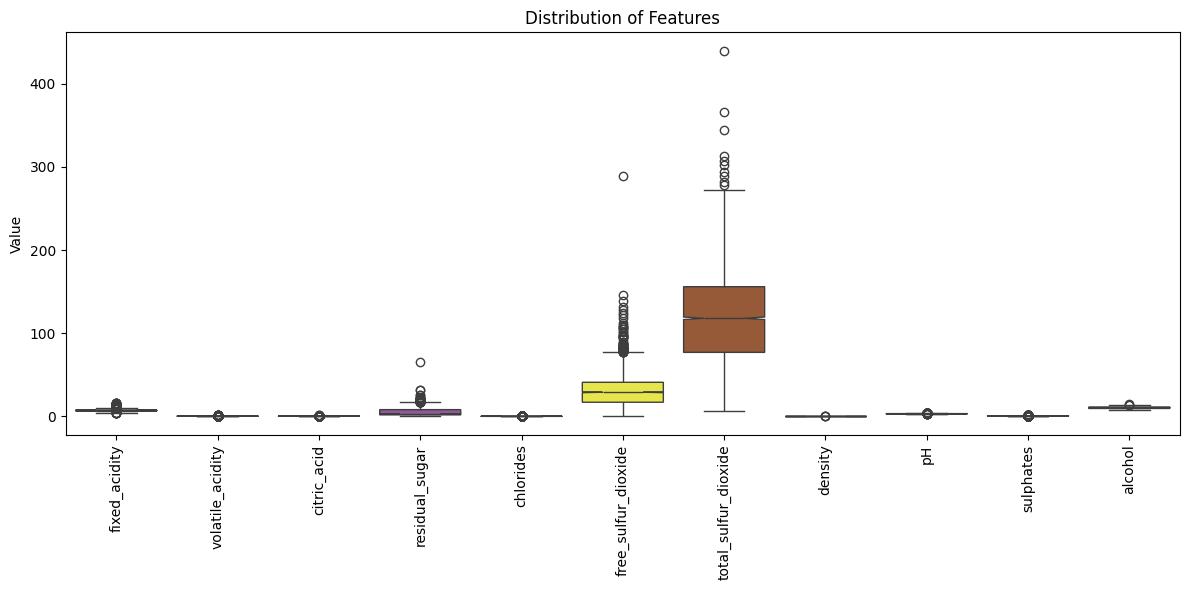

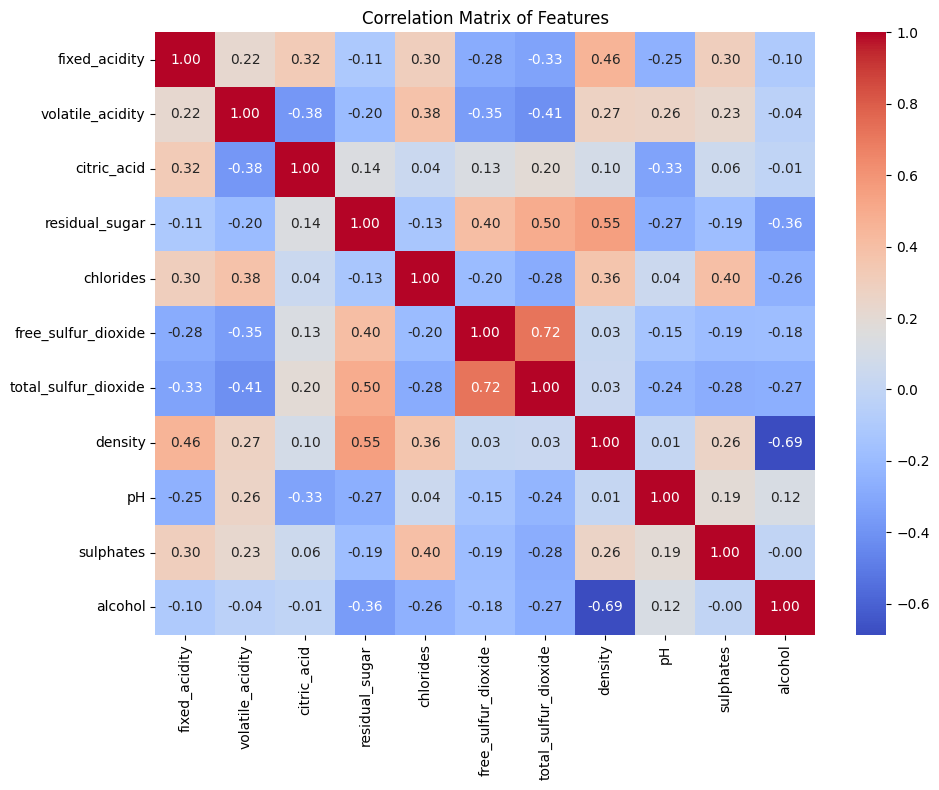

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot for Feature Distributions
fig1, ax1 = plt.subplots(figsize=(12, 6)) # Create a figure and axes
sns.boxplot(data=X, orient="v", palette="Set1", width=0.8, notch=True, ax=ax1) # Plot on ax1
ax1.set_title('Distribution of Features')
ax1.set_ylabel('Value')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90) # Rotate labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Correlation Heatmap
fig2, ax2 = plt.subplots(figsize=(10, 8)) # Create another figure and axes
corr = X.corr() # Calculate the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", ax=ax2) # Plot on ax2 with annotations
ax2.set_title('Correlation Matrix of Features')
plt.tight_layout() # Adjust layout
plt.show()

In [17]:
import numpy as np
Y = np.where(Y <= 5, 0, 1)
print("\n========= Binary Wine Qualities ========= \n")
print(pd.Series(Y).value_counts())


========= Binary Wine Qualities ========= 

1    4113
0    2384
Name: count, dtype: int64


In [20]:
X = df.drop(["quality", "color"], axis=1) #we drop the columns "quality" and "color"
Y = df["quality"]
print("\n========= Wine Qualities ========= \n")
print(Y.value_counts())


========= Wine Qualities ========= 

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64
